In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Progress Report

Progressed by

- Jungmin Kim

- Bojing Gui

- Seunghyeon Park

- Sunghwan Moon

### Project description
We will attempt to develop the foundation model using bio-signal (ECG, Heart Rate) [1] for applying the sleep stage classification from the personal data of edge devices [2], such as Apple Watch or Fit-bit. It is hard to get high performance by only using personally own data from edge devices and to train the model, as limitation of the amount of data for train and low hardware resources of edge devices. We expect that the foundation model generates informative representative feature from large bio-signal dataset, and it can improve the downstream task in the restricted environment that people cannot share bio-signal data to others.

### Overall tasks structure

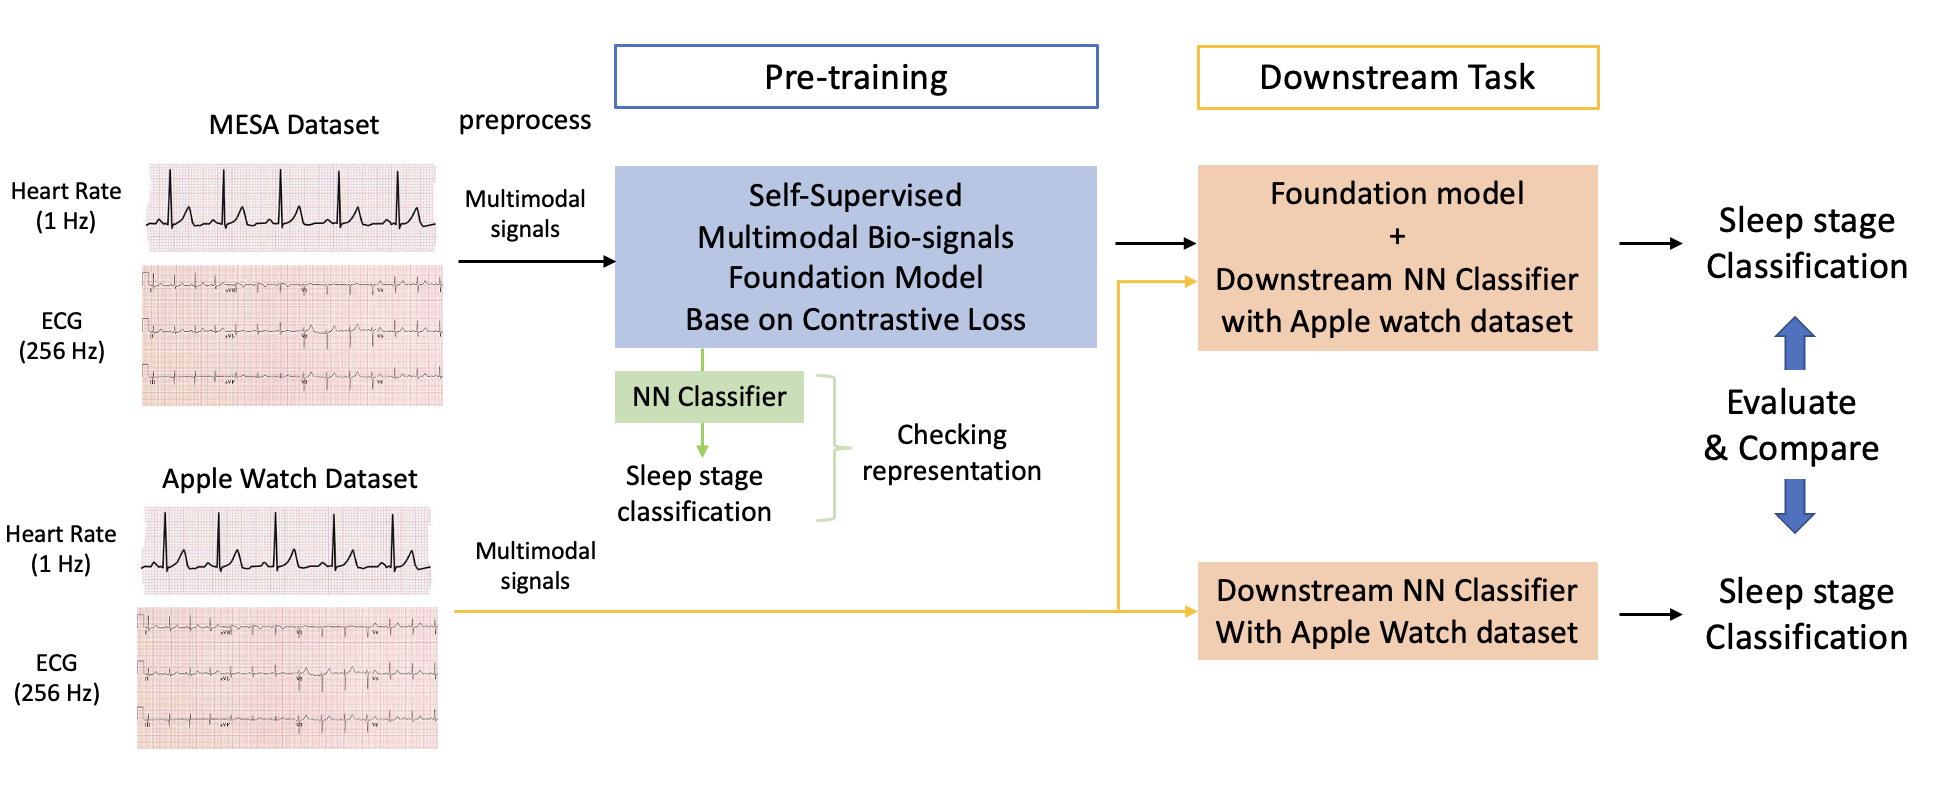

In [2]:
Image(filename='../asset/overall_task_architecture.png')

### 1. Dataset

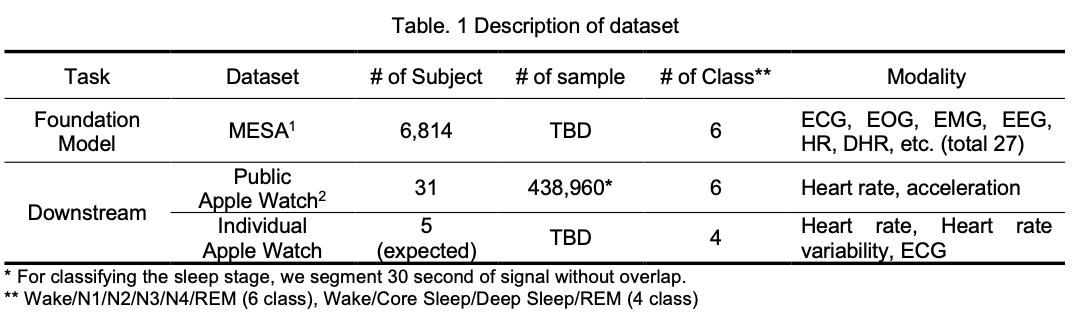

In [3]:
Image(filename='../asset/dataset_description_table.png')

### 2. Model

#### 2-1. Foundation Model
We present the issue that the personalized model in the edge device lacks sufficient data to learn each personalized model. We intend to suggest a solution to the problem by creating a foundation model from a huge amount of bio-signal data that has been made public and improving the performance of the personalized model in the edge device using the foundation model. We plan to develop a foundation model that takes into account each of the 3 issues we established for the problem setting .









Our proposed strategy involves using a huge quantity of publically available bio-signal data to build a foundation model, which can then be used to improve the performance of personalized models on edge devices.

#### Problem setting

Our problem setting is characterized by three main issues:

*  Lack of label in sleep stage classification label.
*  Existence of multimodalities in bio-signal data.
*  Downstream task for personalized model.

#### Why this Foundation model?

To address these 3 primary issues, we aim to incorporate 3 characteristics into our foundation model:

**1. Self-supervised constrastive learning**

First, we assumed that the label had existed in MESA, which is currently open to the public, but bio-signal labels are typically expensive and obtained manually by professionals. Given this, we plan to employ the self-supervised method of continuous learning, which does not require a label, as the foundation model's learning approach.

**2. Considering multimodalities**

Second, we want to create a foundation model that can account for multimodality characteristics because we deal with biosignals from two separate modalities: ECG (256Hz) and heart rate (1Hz). The framework(FOCAL: Contrastive Learning for Multimodal Time-Series Sensing Signals in Factorized Orthogonal Lantent Space, 2023) we referred to can fully utilize multimodal signal information by separating the shared features shared by the two modalities from the private features that each modality has on the latent space.

**3. Subject-aware learning**

Finally, because our foundation model is 'personalized', in which the subject is employed in each different models, it should be possible to avoid domain shift caused by inter-subject variability. Therefore, our foundation model will incorporate subject-invariance into the continuous learning framework so that it can learn domain-invariant characteristics.

#### Existing structure to refer to

- FOCAL Framework

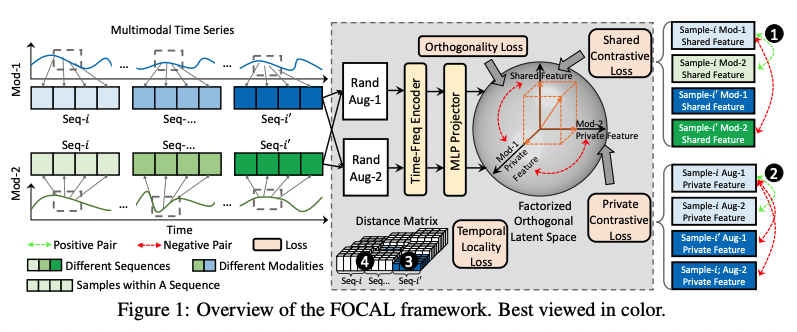

In [4]:
Image(filename='../asset/FOCAL_figure.png')

The FOCAL Framework, proposed in [FOCAL: Contrastive Learning for Multimodal Time-Series Sensing Signals in Factorized Orthogonal Latent Space, 2023], is a self-supervised multimodal contrastive framework. And, in this case, not only is shared information between sensory modalities extracted, but exclusive modality information is not explicitly considered, which could be essential to understanding the underlying sensing physics. We intend to integrate subject-aware learning to this strategy.

#### 2-2. Classification model for Downstream task

- ADD from Bojing

### 3. Progress Result
- We generate the private Github repository for working together
    
    URL: https://github.com/sunghwanism/FM_for_bio_signal

- All of code from our project is restored to github

- As it is hard to sharing all of our code, we want to share our github repo for grading


(If you need to acces for grading, please say your github email. We will change our repo as public after finishing our project)

#### 3-1 Preprocessing

1) MESA data
- We needs to segment the bio signal (heart rate and ecg) to 30 seconds (1 epoch) because sleep stage is decided from 30 seconds data in down stream
- We select validation epoch without any problems, such as disconnection error, mis-collection time between bio signals.

- Heart Rate
    - After selecting validation epoch, the heart rate was **interpolated** to have a value for every 1 second, **smoothed** and **filtered** to amplify periods of high change by convoloving with a diffrence of Gaussian filter and **normalized** by dividing by the 90th percentile in the absolute diffrence between each heart rate measurement and the mean heart rate over the sleep periods
- Electrocardiogram (ECG=EKG)
    - After selecting validation epoch, the ECG was **smoothed** and **filtered** by Gaussian filter for denoising the ECG


2) Apple watch data
- We collected Apple watch data which contains heart rate and acceleration
- We plan to preprocess it following the previous study titled "**Sleep stage prediction with raw acceleration and photoplethysmography heart rate data derived from a consumer wearable device** (Olivia, et al.)"

##### 3-1-1 Preprocessing Result (MESA)

We use **1,405 subjects** among 2,056 after quality contorl

Total segementation (1 epoch during 30s) is **1,487,316**, which is **same number of label (sleep stage)**

Following images show the result of preprocessing on **subject0001** from MESA dataset 

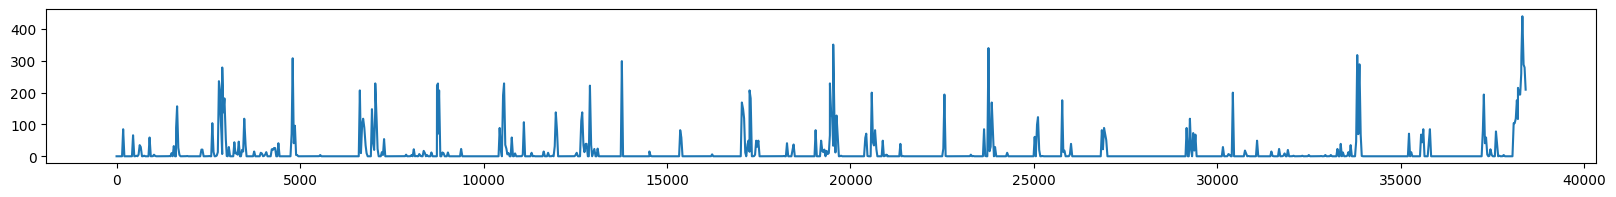

In [5]:
# Actiography
Image(filename='../asset/actiography_0001.png')

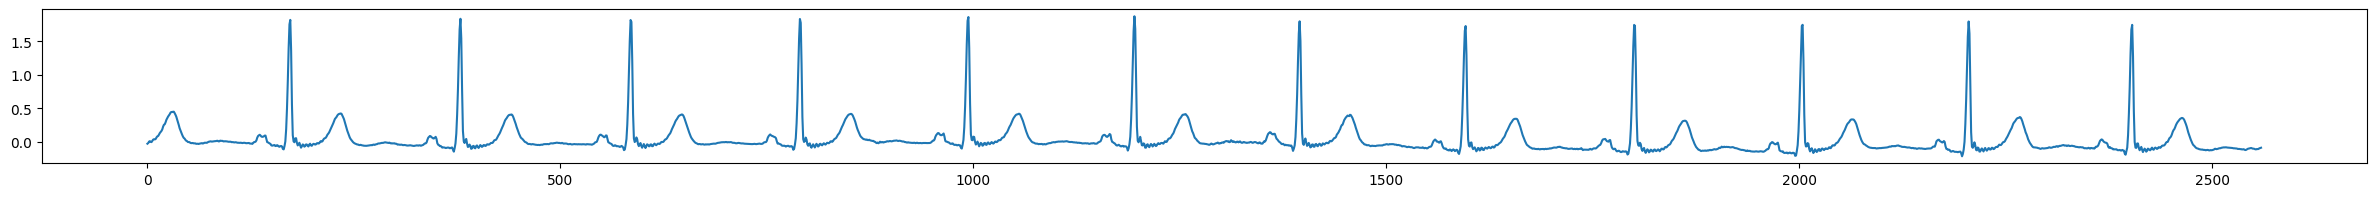

In [6]:
# ECG Image
Image(filename="../asset/ecg_0001.png")

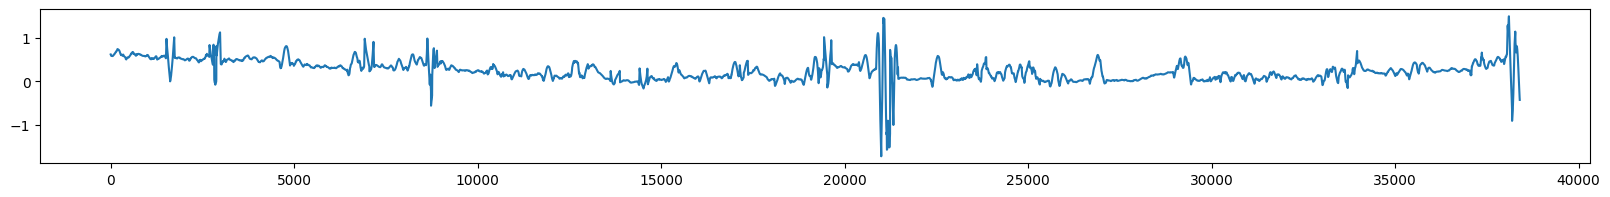

In [7]:
# Heart Rate
Image("../asset/heartrate_0001.png")

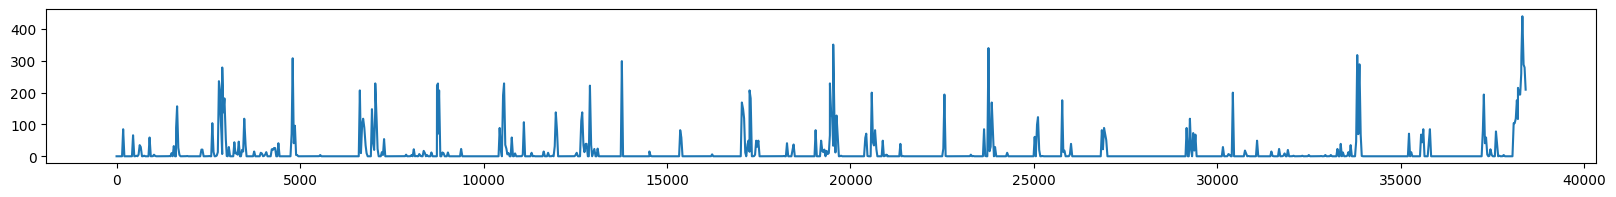

In [8]:
# Actiography
Image("../asset/actiography_0001.png")

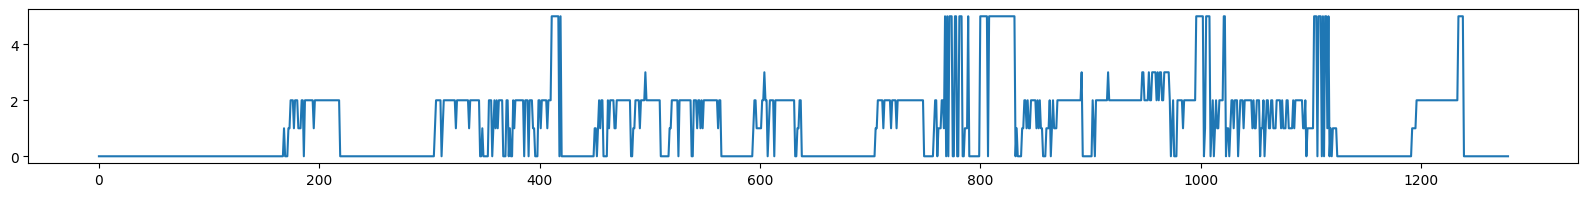

In [9]:
# PSG Status (Sleep Stages)
Image("../asset/psg_0001.png")

##### 3-1-2 Preprocessing Result (Apple watch, Not complete)
- We collect real Apple watch dataset which was collected during 7 days

- We have apple watch dataset, totally 31

- We complete to code for preprocessing Apple watch data but not finishing preprocessing yet


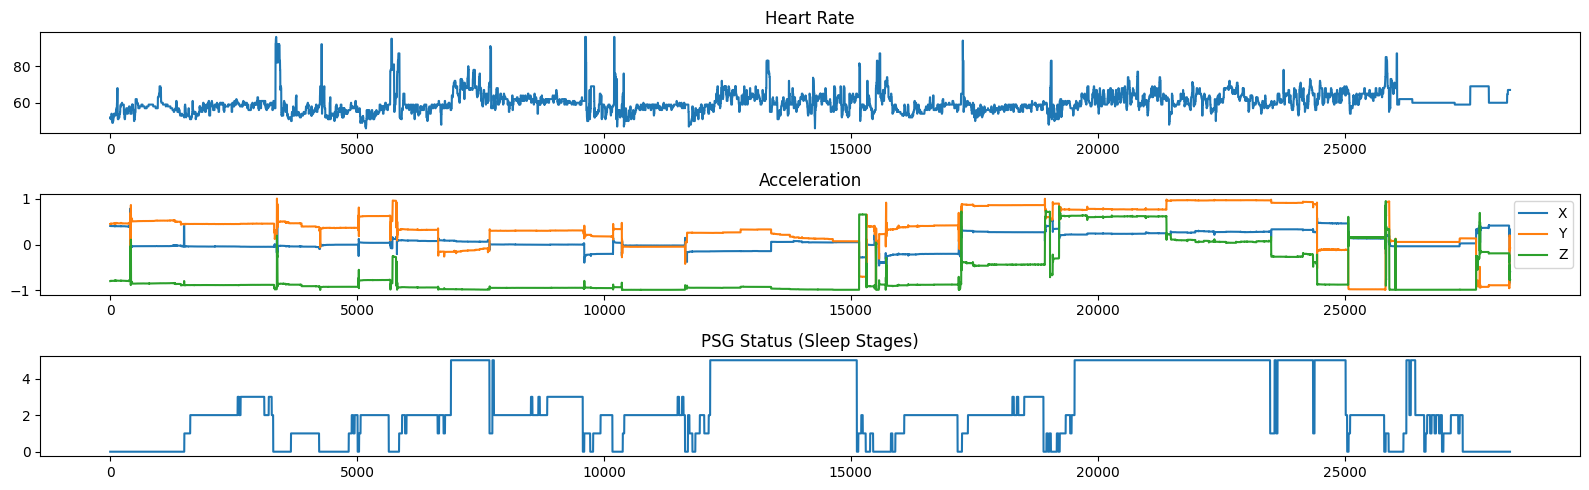

In [10]:
df = pd.read_csv("../preproc/outputs/applewatch_public/c1_data.csv")

fig, ax = plt.subplots(3, 1, figsize=(16, 5))

ax[0].plot(df["heart_rate"])
ax[0].set_title("Heart Rate")

ax[1].plot(df["x_move"])
ax[1].plot(df["y_move"])
ax[1].plot(df["z_move"])
ax[1].legend(["X", "Y", "Z"])
ax[1].set_title("Acceleration")

ax[2].plot(df["psg_status"])
ax[2].set_title("PSG Status (Sleep Stages)")

plt.tight_layout()
plt.show()

#### 3-2 DownStream Modeling for individual model

- For confirming the effectiveness of proposed foundation model, we will train a model individually using conventional base line model in sleep stage classification.

- We split train/validation/test data in each subject

- We find the best model using validation data

- Finally, we test the model performance using test data

##### TinySleepNet

- During progress period, we run the model with sample dataset (partial MESA data) for checking running error

- The below images only show that the model runs without error

- We plan to run the model in our GPU Server (~ing)

- Model is from [GitHub](https://github.com/akaraspt/tinysleepnet)

In [11]:
"""
class SleepNet_ECG(nn.Module):
    def __init__(self):
        super(SleepNet_ECG,self).__init__()
        self.pool1 = nn.MaxPool1d(8, 8) #kernel_size, stride
        self.pool2 = nn.MaxPool1d(4, 4) #kernel_size, stride

        self.conv1 = nn.Conv1d(1, 128, 8) #in_channels, out_chanels, kernel_size
        self.conv2 = nn.Conv1d(128, 128, 8) #in_channels, out_chanels, kernel_size

        self.dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(128,128)

        self.fc1 = nn.Linear(29952, 32)
        self.fc2 = nn.Linear(32, 4)


    def forward(self, ecg):

        ecg = self.pool1(ecg)
        ecg = self.dropout(ecg)
        ecg = F.relu(self.conv1(ecg))
        ecg = F.relu(self.conv2(ecg))
        ecg = self.pool2(F.relu(self.conv2(ecg)))
        ecg = self.dropout(ecg)

        # Transpose dimensions for LSTM input
        ecg = ecg.permute(2, 0, 1)  # Shape: [seq_len, batch_size, input_size]
        
        ecg, _ = self.lstm(ecg)
        ecg = self.dropout(ecg)

        #Get size of final layer
        x_dim = ecg.size(0) * ecg.size(2)

        ecg = ecg.view(-1, x_dim)

        ecg = F.relu(self.fc1(ecg))
        ecg = self.fc2(ecg)
        ecg = ecg.squeeze(1) # Flatten to [batch_size]

        return ecg
"""

'\nclass SleepNet_ECG(nn.Module):\n    def __init__(self):\n        super(SleepNet_ECG,self).__init__()\n        self.pool1 = nn.MaxPool1d(8, 8) #kernel_size, stride\n        self.pool2 = nn.MaxPool1d(4, 4) #kernel_size, stride\n\n        self.conv1 = nn.Conv1d(1, 128, 8) #in_channels, out_chanels, kernel_size\n        self.conv2 = nn.Conv1d(128, 128, 8) #in_channels, out_chanels, kernel_size\n\n        self.dropout = nn.Dropout(0.5)\n        self.lstm = nn.LSTM(128,128)\n\n        self.fc1 = nn.Linear(29952, 32)\n        self.fc2 = nn.Linear(32, 4)\n\n\n    def forward(self, ecg):\n\n        ecg = self.pool1(ecg)\n        ecg = self.dropout(ecg)\n        ecg = F.relu(self.conv1(ecg))\n        ecg = F.relu(self.conv2(ecg))\n        ecg = self.pool2(F.relu(self.conv2(ecg)))\n        ecg = self.dropout(ecg)\n\n        # Transpose dimensions for LSTM input\n        ecg = ecg.permute(2, 0, 1)  # Shape: [seq_len, batch_size, input_size]\n        \n        ecg, _ = self.lstm(ecg)\n        ec

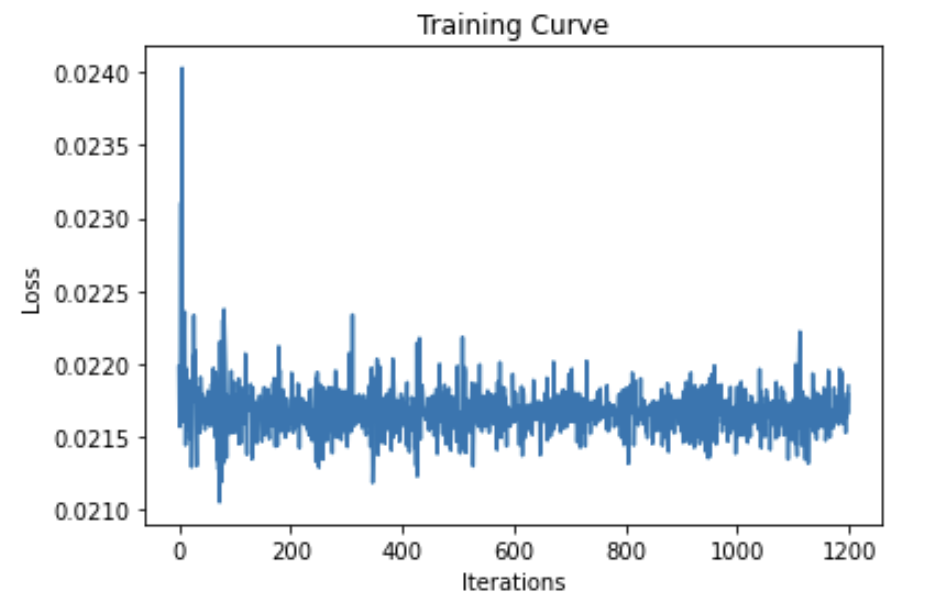

In [18]:
Image("../asset/sample_individual_train_1.png", width=400, height=400)

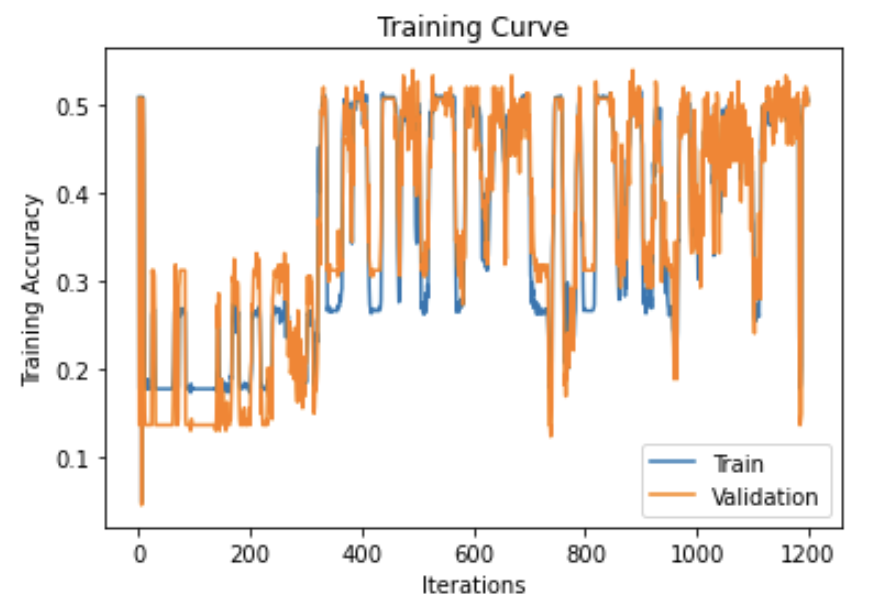

In [17]:
Image("../asset/sample_individual_train_2.png", width=400, height=400)

#### 3-3 Foundation model

- We develop the foundation model using [Foundation Model Paper](https://machinelearning.apple.com/research/large-scale-training) and [Foundation Model based on Multimodal data Paper](https://arxiv.org/abs/2310.20071) for solving problems we set

- We plan to utilize the code from [Github](https://github.com/tomoyoshki/focal)